#### **Final Project**
**Who Looks Like Me ?**

Prepared by
- Nikhil Shankar C S
- Sreehari Prathap

##### **A machine learning model built on InceptionV3 trained on imagenet database used for predicting similarity of a face with celebrity faces.**

#### **Data Collection**

- Initially we used a hugging face dataset in parquet format and parsed it and created images out of the file. This was a great database nut after some trials we found out that for our purpose it wont be helpful.
- It contained 18000+ images for 1000+ celebrities. Around 18 per person.

- After realizing this we found another database in Kaggle with 18k+ images for 100 celebrities and we are going to use that for our purpose.

HuggingFace Link : https://huggingface.co/datasets/ares1123/celebrity_dataset?sql=--+The+SQL+console+is+powered+by+DuckDB+WASM+and+runs+entirely+in+the+browser.%0A--+Get+started+by+typing+a+query+or+selecting+a+view+from+the+options+below.%0ASELECT+*+FROM+train+LIMIT+10%3B

Kaggle Link : https://www.kaggle.com/datasets/hereisburak/pins-face-recognition

#### **EDA**

c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\WhoLooksLikeMe-Model\WLLM-Nikhil-Model-Classes-2\EDA.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=image_counts.index, y=image_counts.values, palette='viridis')


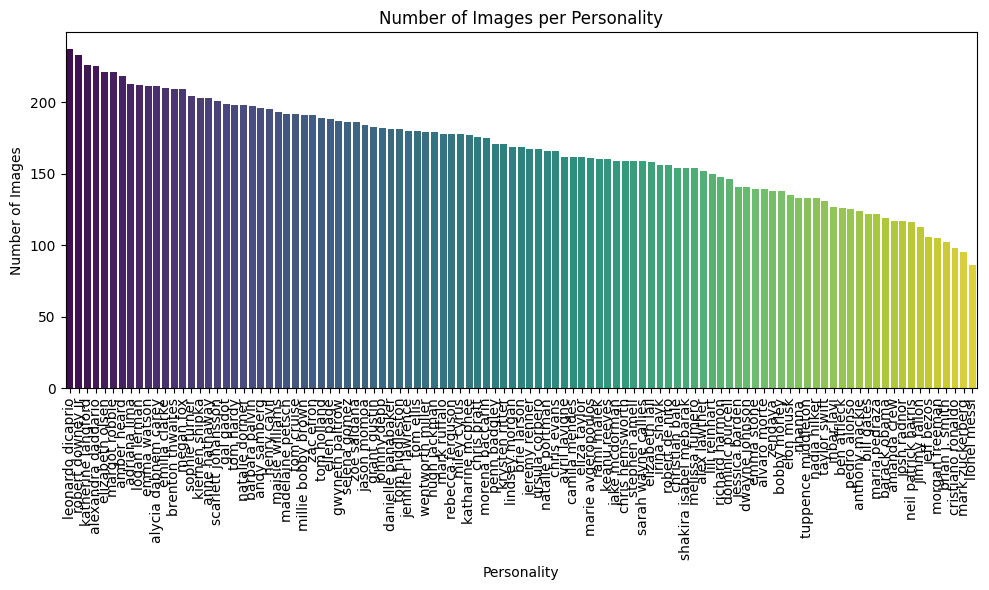

Personality with minimum images: lionel messi (86 images)
Personality with maximum images: leonardo dicaprio (237 images)


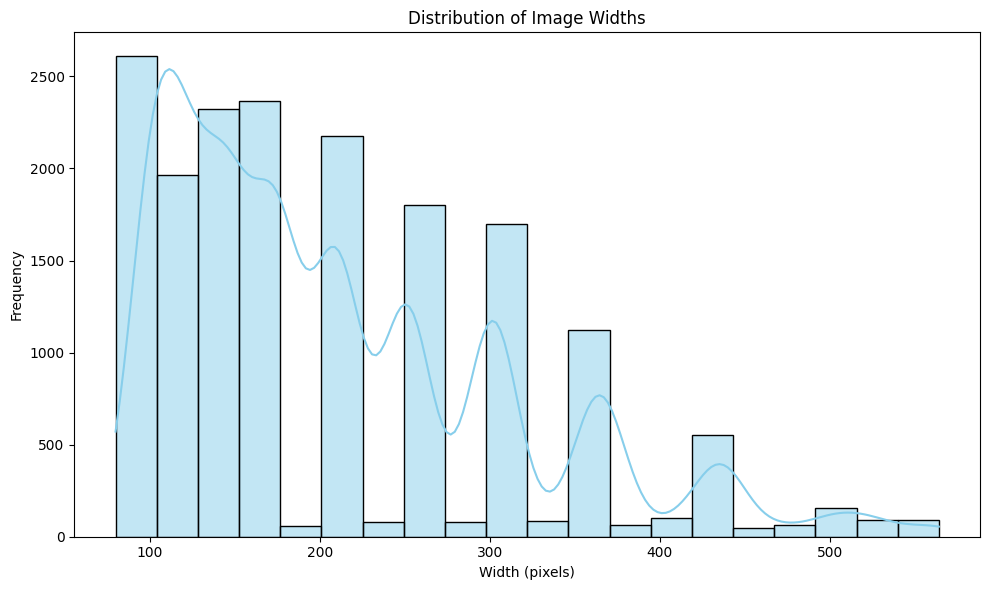

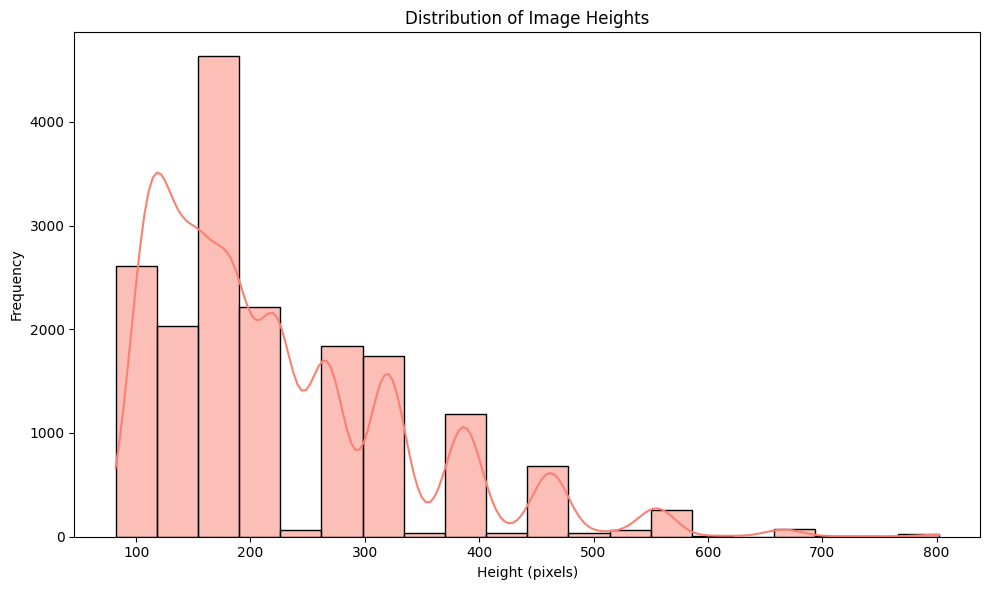

c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\WhoLooksLikeMe-Model\WLLM-Nikhil-Model-Classes-2\EDA.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(type_counts.keys()), y=list(type_counts.values()), palette='Set2')


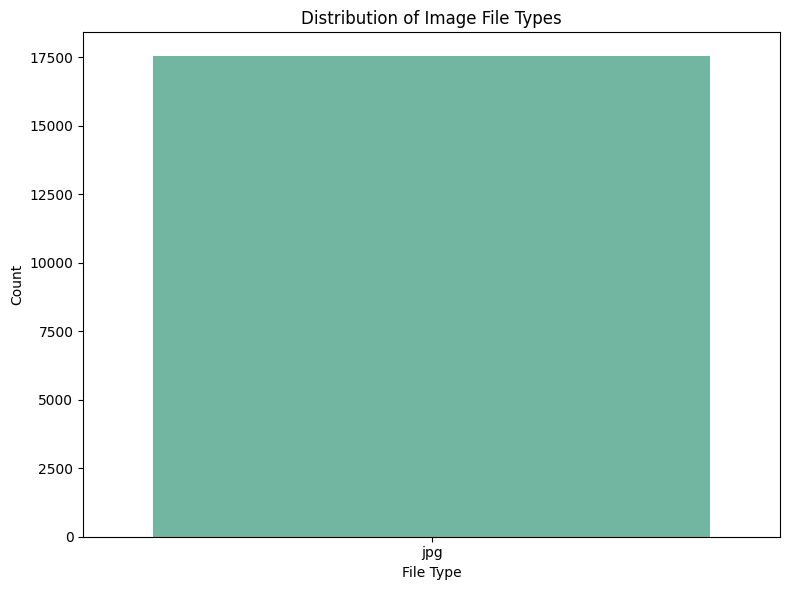

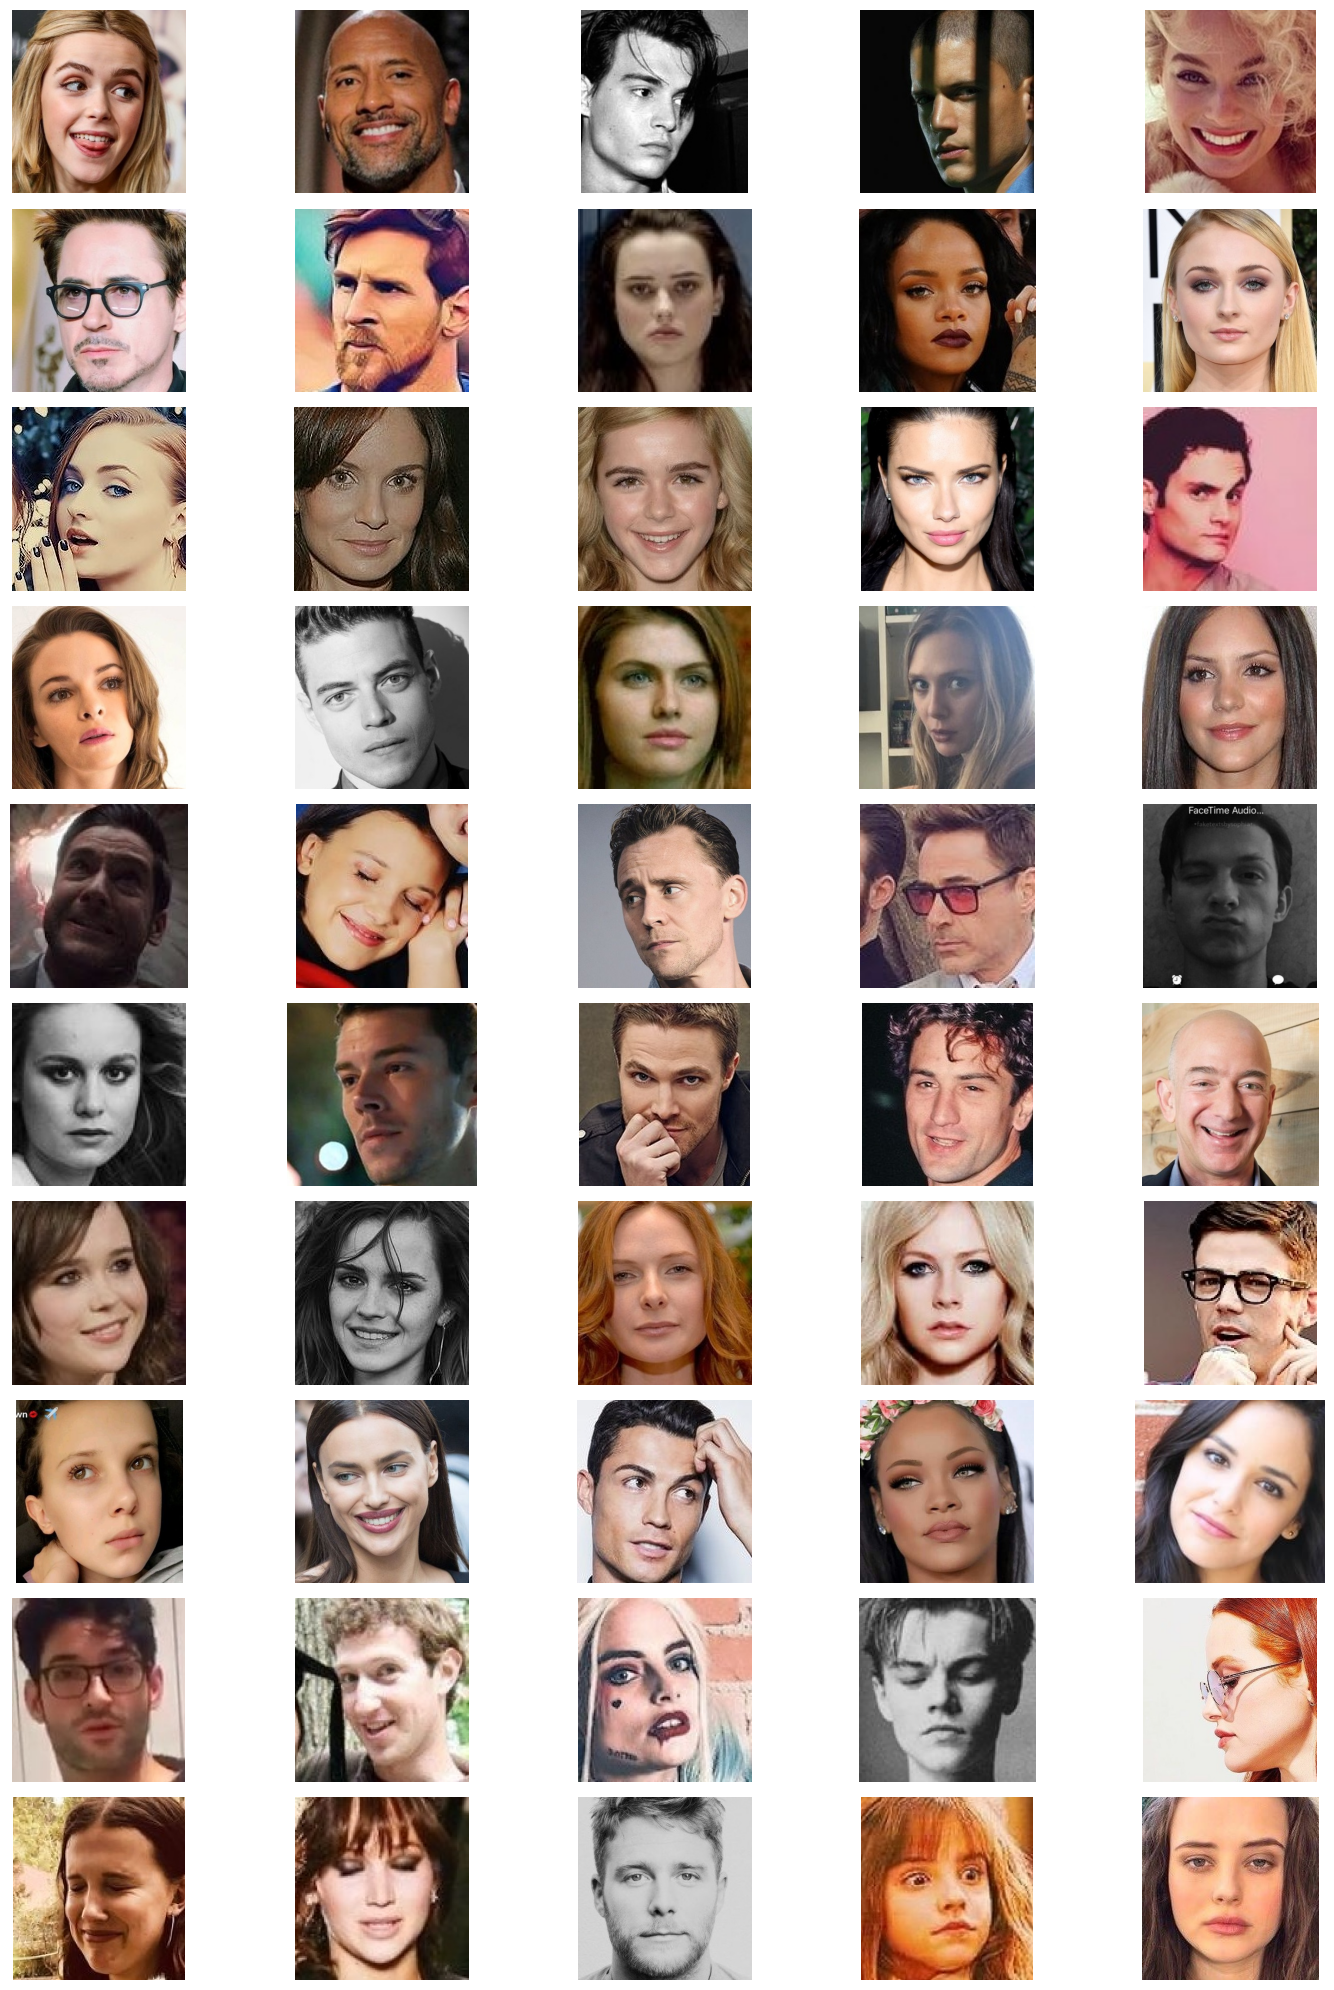

All EDA results have been saved in the output directory.


In [1]:
from EDA import EDA

eda = EDA("../dataset", "EDA")
eda.calculate_eda()

#### **Train and Test Setup**

We created 2 classes 
- **DataPreparation.py**
- **TrainTestSplitter.py**

These two classes will do the following
- Select random N folders from the oriiginal dataset path and copy it to output folder Datapreparation class also accepts a range wherein you can choose which range of folders you want to move for training and testing.
- TrainTestSplitter accepts a folder path essentially the output path of datapreparation and then splits the files into train and test folders. The traintestsplitter accepts a parameter to decide how many images should be moved to the test folder.

In [ ]:
from TrainTestSplitter import TrainTestSplitter
from DataPreparation import DataPreparation
from WLLMSimilarityCalculatorAdvancedCorrected import SimilarityCalculatorAdvancedCorrected2
from WLLMModel import WLLMModel
import os
from datetime import datetime
from WLLMModelLoader import WLLMModelLoader


#Dont edit this
modelname_prefix = "WLLM-Model-Selected"
username = input("Enter your name")
formatted_date = datetime.now().strftime("%m-%d-%H-%M")
sample_class_range= (50,102)
sample_class_range_name = "L2"

model_name = f"{modelname_prefix}-{username}-{sample_class_range_name}-{formatted_date}"

#TODO Point this to your repository of all images
original_data_dir = "../../../DontEditThese/Dataset3"

model_info_root_save_dir = "../SavedTrainingData/savedmodels"
dataset_dir = f"../TrainingDataImages/{model_name}"  # Path to your dataset folder
savedmodels_dir = f"{model_info_root_save_dir}/{model_name}"
embeddings_dir = f"{model_info_root_save_dir}/{model_name}/embeddings"

# Check if the folder exists; if not, create it
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Check if the folder exists; if not, create it
if not os.path.exists(embeddings_dir):
    os.makedirs(embeddings_dir)

# Check if the folder exists; if not, create it
if not os.path.exists(savedmodels_dir):
    os.makedirs(savedmodels_dir)


#Copy sample class number of images from original repo to dataset_dir
data_preparation = DataPreparation(original_data_dir, dataset_dir, sample_range=sample_class_range)
selected_classes = data_preparation.prepare_data()

#Split data to train and test
splitter = TrainTestSplitter(dataset_dir)
splitter.create_train_test_split(test_file_count=4)

> Please note that the ipynb file was created after all training and testing was done after a lot of experimentation. So some of the codeblocks are not executed due to time constraints.

> We have saved the plots and calculated the time taken and saved it in csv files which will be attached and shown in the ipynb file.

#### **Model Architecture**

The final model we chose is the InceptionV3 base model trained on ImageNet dataset.
- Optimizer : Adam 
- Learning rate : 0.001 
- Top was not included.
- 100 epochs
- stop_early: true
- patience : 10
- monitoring metric : val_loss
- Unfrozen layers : Last 15 layers
- Trainable parameters : 501,044
- Total parameters: 21,909,332

> The output is being read from a saved file. 

In [6]:
file_path = '../../WhoLooksLikeMe-Model/SavedTrainingData/savedmodels/WLLM-Model-Nikhil-L2-12-10-01-24/ModelSummary.txt'
with open(file_path, 'r', encoding="utf-8") as file:
    for line in file:
        print(line.strip())


Model: "functional"
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │

##### **Model Architecture Head**

- We have two additional layers added on top of the base.
- Embedding Layer : Used to extract out the embeddings of each person and save it for cosine similarity calculation. This layer is a flattened layer.
- Classsification Layer : This layer is a dense layer with Number of classes of neurons and uses softmax for getting the probabilities for each class.

#### **Training**

In [ ]:
## Training the model
model = WLLMModel(dataset_dir, savedmodels_dir)
model.train_model(output_dir=savedmodels_dir, epochs=100, batch_size=32)

![alt text](../../WhoLooksLikeMe-Model/SavedTrainingData/savedmodels/WLLM-Model-Nikhil-C-12-09-22-11/TrainingAndValidationPlot.png)

- We trained 4 models

- 3 models were created with 10 celebrities trained per model
- 4th one a single model trained on 50 celebrities together.

#### **Confusion Matrix**

![alt text](../../WhoLooksLikeMe-Model/SavedTrainingData/savedmodels/WLLM-Model-Nikhil-L2-12-10-01-24/confusion_matrix.png)

Vertically seeping through the plot we can identify which personality is getting predicted more.

Horizontally seeping through the plot we can identify who is getting predicted wrong.

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the confusion matrix CSV file into a pandas DataFrame
df = pd.read_csv('../../WhoLooksLikeMe-Model/SavedTrainingData/savedmodels/WLLM-Model-Nikhil-L2-12-10-01-24/ConfusionMatrix.csv', index_col=0)

# Initialize empty lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# For each column (personality), calculate the metrics
for index, column in enumerate(df.columns):
    if index == 0: 
        continue
    # Confusion matrix values
    true_positives = df.loc[column, column]
    false_positives = df[column].sum() - true_positives
    false_negatives = df.loc[column].sum() - true_positives
    true_negatives = df.sum().sum() - (true_positives + false_positives + false_negatives)
    
    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score([column]*df.shape[0], df[column])
    precision = precision_score([column]*df.shape[0], df[column], average='binary')
    recall = recall_score([column]*df.shape[0], df[column], average='binary')
    f1 = f1_score([column]*df.shape[0], df[column], average='binary')
    
    # Append the values to the corresponding lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to display the results
metrics_df = pd.DataFrame({
    'Personality': df.columns,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the results
print(metrics_df)



ValueError: Mix of label input types (string and number)